In [2]:
!pip install pandas && \
pip install matplotlib && \
pip install numpy

Este es el comando para compilar:

In [65]:
!g++ -o main -I ./eigen-3.3.9/ -I ./json/single_include/ main.cpp

In [152]:
!./main 5 2 8 1

v: 1
kappa: 0
b_x: 1
alpha: 0
beta: 0
h: 0.2
a: -27.5
b: 50
c: -22.5
Puntos interiores:
points[0] = 0.2
points[1] = 0.4
points[2] = 0.6
points[3] = 0.8
Matriz A:
Nonzero entries:
(50,0) (-27.5,1) (_,_) (-22.5,0) (50,1) (-27.5,2) (_,_) (_,_) (_,_) (_,_) (-22.5,1) (50,2) (-27.5,3) (_,_) (-22.5,2) (50,3) 

Outer pointers:
0 3 10 14  $
Inner non zeros:
2 3 3 2  $

50 -22.5 0 0 
-27.5 50 -22.5 0 
0 -27.5 50 -22.5 
0 0 -27.5 50 

Vector F:
1
1
1
1
h: 0.1
a: -105
b: 200
c: -95
Puntos interiores:
points[0] = 0.1
points[1] = 0.2
points[2] = 0.3
points[3] = 0.4
points[4] = 0.5
points[5] = 0.6
points[6] = 0.7
points[7] = 0.8
points[8] = 0.9
Matriz A:
Nonzero entries:
(200,0) (-105,1) (_,_) (-95,0) (200,1) (-105,2) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (-95,1) (200,2) (-105,3) (_,_) (-95,2) (200,3) (-105,4) (_,_) (-95,3) (200,4) (-105,5) (_,_) (-95,4) (200,5) (-105,6) (_,_) (-95,5) (200,6) (-105,7) (_,_) (-95,6) (200,7) (-105,8) (_,_) (-95,7) (200,8) 


In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def calcular_errores_normas(x_num, y_num, x_continuo, y_analitica, h):

    # Interpolar la solución analítica en los puntos de la malla numérica
    y_analitica_interpolada = np.interp(x_num, x_continuo, y_analitica)
    
    # Calcular el error (diferencia entre la solución numérica y la analítica)
    error = y_num - y_analitica_interpolada
    
    # Norma L2 discreta (norma 2)
    error_L2 = np.sqrt(np.sum(h * np.abs(error)**2))  # Eleva el error al cuadrado, multiplica por h y suma
    
    # Norma L∞ (norma infinita)
    error_L_inf = np.max(np.abs(error))  # Toma el máximo valor absoluto del error
    
    return error_L2, error_L_inf, error

Evaluamos la solucion respectiva:

Norma L2 discreta: 2.4435787546225285e-07
Norma L infinito: 6.835672126531689e-07
Error en cada punto: [ 7.23148780e-08  3.31644560e-08  6.30398598e-08  5.89615025e-08
  4.60588276e-08  6.51562807e-08  1.81636173e-08  7.95692992e-08
  1.58461032e-08  7.00766059e-08  4.20964075e-08  6.46099612e-08
  6.15765164e-08  4.11570112e-08  7.23030635e-08  1.77614618e-08
  7.23488334e-08  7.06209341e-08  1.98429364e-08  7.51815976e-08
  1.29709838e-08  3.47103763e-08  6.99752636e-08  6.74789565e-08
  2.33664327e-08  9.18159702e-08  3.72425081e-08  2.61071724e-08
  7.05094844e-08  8.87956191e-08  4.16401385e-08 -1.61815489e-09
  6.91648202e-08  1.76210817e-08  7.16716307e-08  5.20364020e-08
  6.78066031e-08  8.96503121e-08  7.62738821e-08  4.91970992e-08
  1.58359052e-08  4.94694379e-08  8.03396670e-08  1.09318572e-07
  1.50672321e-08  4.76544971e-08  3.79876265e-08 -1.65538571e-08
  6.81003495e-08  6.52761393e-08  1.24464114e-07  3.02845743e-08
  2.61970325e-08  5.04748278e-08  9.24767987e-08  4.

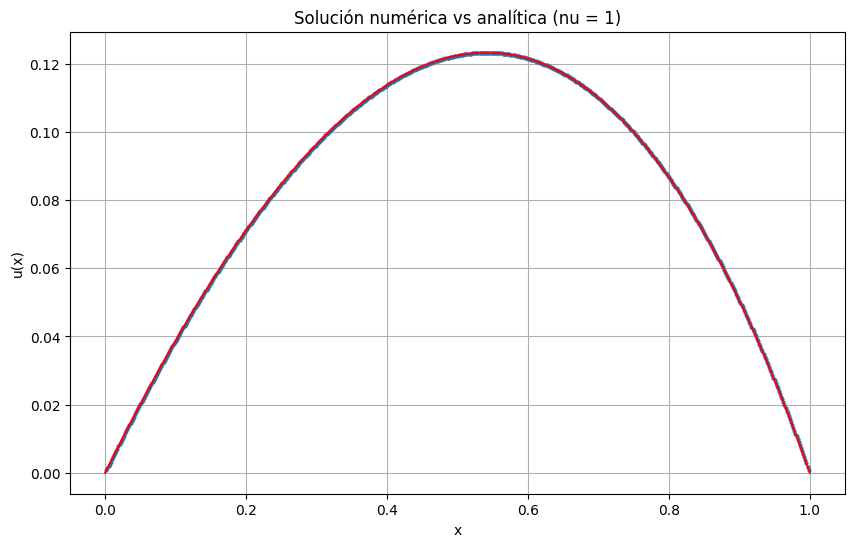

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
nu = 1 # Este parametro debe coincidir con el enviado anteriormente a C++

x_continuo = np.linspace(0, 1, 1000)
# y_analitica = np.sin(osc * np.pi * x_continuo)
y_analitica = ( 1- np.exp(x_continuo / nu) ) / (np.exp(1 / nu) - 1) + x_continuo

df = pd.read_csv("solucion0.csv")
plt.figure(figsize=(10, 6))
plt.plot(df["x"], df["y"], marker='o',markersize=2, linestyle='None') # Para que no esten unidos los puntos
# Solucion analitica
plt.plot(x_continuo, y_analitica, linestyle='-', color='red')


# Extraer los puntos de la malla numérica y la solución numérica
x_num = df["x"].to_numpy()
y_num = df["y"].to_numpy()

# Tamaño del paso (asumimos que los puntos están igualmente espaciados)
h = x_num[1] - x_num[0]
error_L2, error_L_inf, error = calcular_errores_normas(x_num, y_num, x_continuo, y_analitica, h)

print(f"Norma L2 discreta: {error_L2}")
print(f"Norma L infinito: {error_L_inf}")
print("Error en cada punto:", error)

plt.xlabel("x")
plt.ylabel("u(x)")
plt.title(f"Solución numérica vs analítica (nu = {nu})")
plt.grid(True)
plt.show()

In [154]:
!./main 5 2 8 0.01

v: 0.01
kappa: 0
b_x: 1
alpha: 0
beta: 0
h: 0.2
a: -2.75
b: 0.5
c: 2.25
Puntos interiores:
points[0] = 0.2
points[1] = 0.4
points[2] = 0.6
points[3] = 0.8
Matriz A:
Nonzero entries:
(0.5,0) (-2.75,1) (_,_) (2.25,0) (0.5,1) (-2.75,2) (_,_) (_,_) (_,_) (_,_) (2.25,1) (0.5,2) (-2.75,3) (_,_) (2.25,2) (0.5,3) 

Outer pointers:
0 3 10 14  $
Inner non zeros:
2 3 3 2  $

0.5 2.25 0 0 
-2.75 0.5 2.25 0 
0 -2.75 0.5 2.25 
0 0 -2.75 0.5 

Vector F:
1
1
1
1
h: 0.1
a: -6
b: 2
c: 4
Puntos interiores:
points[0] = 0.1
points[1] = 0.2
points[2] = 0.3
points[3] = 0.4
points[4] = 0.5
points[5] = 0.6
points[6] = 0.7
points[7] = 0.8
points[8] = 0.9
Matriz A:
Nonzero entries:
(2,0) (-6,1) (_,_) (4,0) (2,1) (-6,2) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (4,1) (2,2) (-6,3) (_,_) (4,2) (2,3) (-6,4) (_,_) (4,3) (2,4) (-6,5) (_,_) (4,4) (2,5) (-6,6) (_,_) (4,5) (2,6) (-6,7) (_,_) (4,6) (2,7) (-6,8) (_,_) (4,7) (2,8) 

Outer pointers:
0 3 20 24 28 32 36 40 44  $
Inner 

Norma L2 discreta: 0.00015417315813426368
Norma L infinito: 0.001375307673418702
Error en cada punto: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

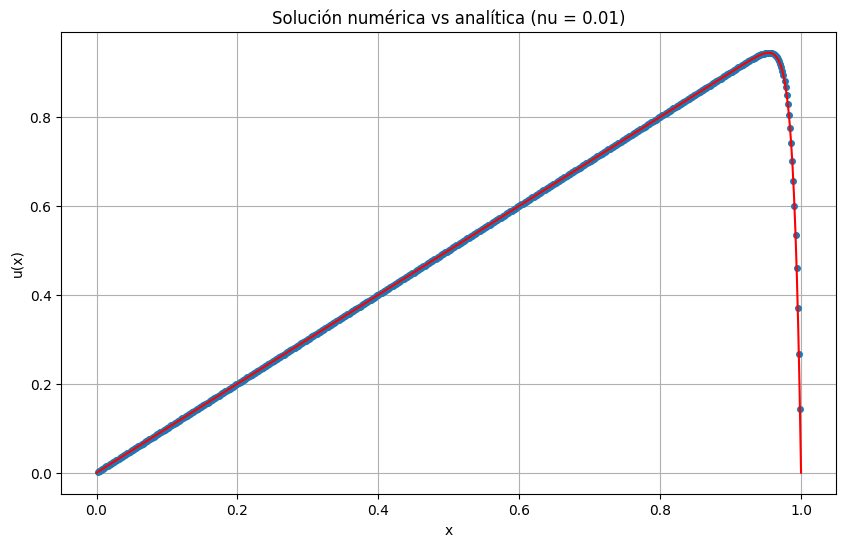

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
nu = 0.01 # Este parametro debe coincidir con el enviado anteriormente a C++

x_continuo = np.linspace(0, 1, 1000)
# y_analitica = np.sin(osc * np.pi * x_continuo)
y_analitica = ( 1- np.exp(x_continuo / nu) ) / (np.exp(1 / nu) - 1) + x_continuo

df = pd.read_csv("solucion-2.csv")
plt.figure(figsize=(10, 6))
plt.plot(df["x"], df["y"], marker='o',markersize=2, linestyle='None') # Para que no esten unidos los puntos
plt.plot(x_continuo, y_analitica, linestyle='-', color='red')


# Extraer los puntos de la malla numérica y la solución numérica
x_num = df["x"].to_numpy()
y_num = df["y"].to_numpy()

# Tamaño del paso (asumimos que los puntos están igualmente espaciados)
h = x_num[1] - x_num[0]
error_L2, error_L_inf, error = calcular_errores_normas(x_num, y_num, x_continuo, y_analitica, h)

print(f"Norma L2 discreta: {error_L2}")
print(f"Norma L infinito: {error_L_inf}")
print("Error en cada punto:", error)


plt.xlabel("x")
plt.ylabel("u(x)")
plt.title(f"Solución numérica vs analítica (nu = {nu})")
plt.grid(True)
plt.show()

In [156]:
!./main 5 2 8 0.0001

v: 0.0001
kappa: 0
b_x: 1
alpha: 0
beta: 0
h: 0.2
a: -2.5025
b: 0.005
c: 2.4975
Puntos interiores:
points[0] = 0.2
points[1] = 0.4
points[2] = 0.6
points[3] = 0.8
Matriz A:
Nonzero entries:
(0.005,0) (-2.5025,1) (_,_) (2.4975,0) (0.005,1) (-2.5025,2) (_,_) (_,_) (_,_) (_,_) (2.4975,1) (0.005,2) (-2.5025,3) (_,_) (2.4975,2) (0.005,3) 

Outer pointers:
0 3 10 14  $
Inner non zeros:
2 3 3 2  $

0.005 2.4975 0 0 
-2.5025 0.005 2.4975 0 
0 -2.5025 0.005 2.4975 
0 0 -2.5025 0.005 

Vector F:
1
1
1
1
h: 0.1
a: -5.01
b: 0.02
c: 4.99
Puntos interiores:
points[0] = 0.1
points[1] = 0.2
points[2] = 0.3
points[3] = 0.4
points[4] = 0.5
points[5] = 0.6
points[6] = 0.7
points[7] = 0.8
points[8] = 0.9
Matriz A:
Nonzero entries:
(0.02,0) (-5.01,1) (_,_) (4.99,0) (0.02,1) (-5.01,2) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (_,_) (4.99,1) (0.02,2) (-5.01,3) (_,_) (4.99,2) (0.02,3) (-5.01,4) (_,_) (4.99,3) (0.02,4) (-5.01,5) (_,_) (4.99,4) (0.02,5) (-5.01,6) (_,_) (4.99,

Norma L2 discreta: 0.048172213610358026
Norma L infinito: 0.7730717584520543
Error en cada punto: [-1.34441069e-17 -2.68882139e-17  2.94902991e-17 -5.37764278e-17
 -2.42861287e-17  5.89805982e-17 -7.80625564e-17  5.20417043e-18
  9.02056208e-17 -4.85722573e-17  3.46944695e-17  6.24500451e-17
 -2.08166817e-17  3.12250226e-17  2.08166817e-17  1.04083409e-17
 -6.93889390e-18 -2.08166817e-17  4.16333634e-17 -4.85722573e-17
 -1.38777878e-17  6.93889390e-17 -6.93889390e-17  1.38777878e-17
  1.04083409e-16 -4.16333634e-17  4.16333634e-17  6.24500451e-17
 -6.93889390e-18  4.16333634e-17  2.08166817e-17  2.08166817e-17
  0.00000000e+00 -2.08166817e-17  5.55111512e-17 -4.16333634e-17
 -6.93889390e-18  8.32667268e-17 -5.55111512e-17  2.77555756e-17
  1.11022302e-16 -2.77555756e-17  5.55111512e-17  6.93889390e-17
  0.00000000e+00  4.16333634e-17  2.77555756e-17  2.77555756e-17
  0.00000000e+00 -1.38777878e-17  5.55111512e-17 -2.77555756e-17
  1.38777878e-17  8.32667268e-17 -4.16333634e-17  4.16333

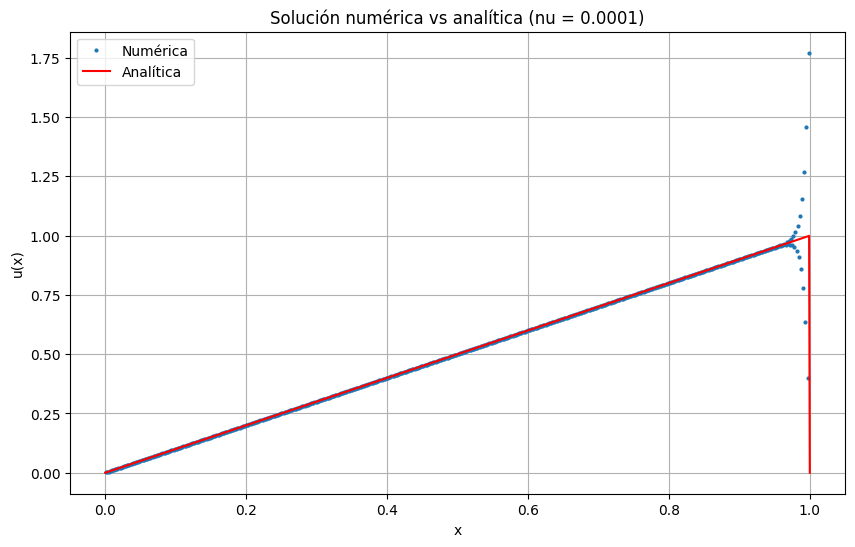

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

nu = 0.0001  # o cualquier valor pequeño
x_continuo = np.linspace(0, 1, 1000)

# Evita overflow usando forma estable
expo = np.exp((x_continuo - 1) / nu)
y_analitica = (1 - expo) / (1 - np.exp(-1 / nu)) + x_continuo -1


df = pd.read_csv("solucion-4.csv")
plt.figure(figsize=(10, 6))
plt.plot(df["x"], df["y"], marker='o', linestyle='None', markersize=2, label="Numérica")
plt.plot(x_continuo, y_analitica, color='red', label="Analítica")

# Extraer los puntos de la malla numérica y la solución numérica
x_num = df["x"].to_numpy()
y_num = df["y"].to_numpy()

# Tamaño del paso (asumimos que los puntos están igualmente espaciados)
h = x_num[1] - x_num[0]
error_L2, error_L_inf, error = calcular_errores_normas(x_num, y_num, x_continuo, y_analitica, h)

print(f"Norma L2 discreta: {error_L2}")
print(f"Norma L infinito: {error_L_inf}")
print("Error en cada punto:", error)

plt.xlabel("x")
plt.ylabel("u(x)")
plt.title(f"Solución numérica vs analítica (nu = {nu})")
plt.legend()
plt.grid(True)
plt.show()


In [184]:
!g++ -o problema2d -I ./eigen-3.3.9/ problema2d.cpp && \
./problema2d 32 1 0 2 5

Resolviendo con N = 32
Resolviendo con N = 64
Resolviendo con N = 128
Resolviendo con N = 256
Resolviendo con N = 512


In [200]:
!g++ -o edp2d_difadv -I ./eigen-3.3.9/ edp2d_difadv.cpp && \
./edp2d_difadv

Refinamiento N=33 completado.
Refinamiento N=65 completado.
Refinamiento N=129 completado.
Refinamiento N=257 completado.
Refinamiento N=513 completado.
^C


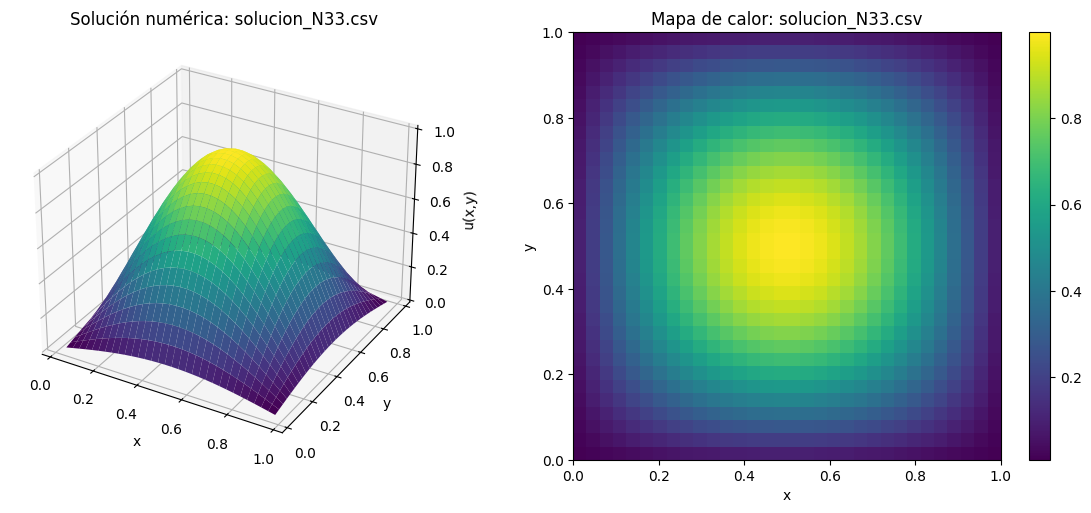

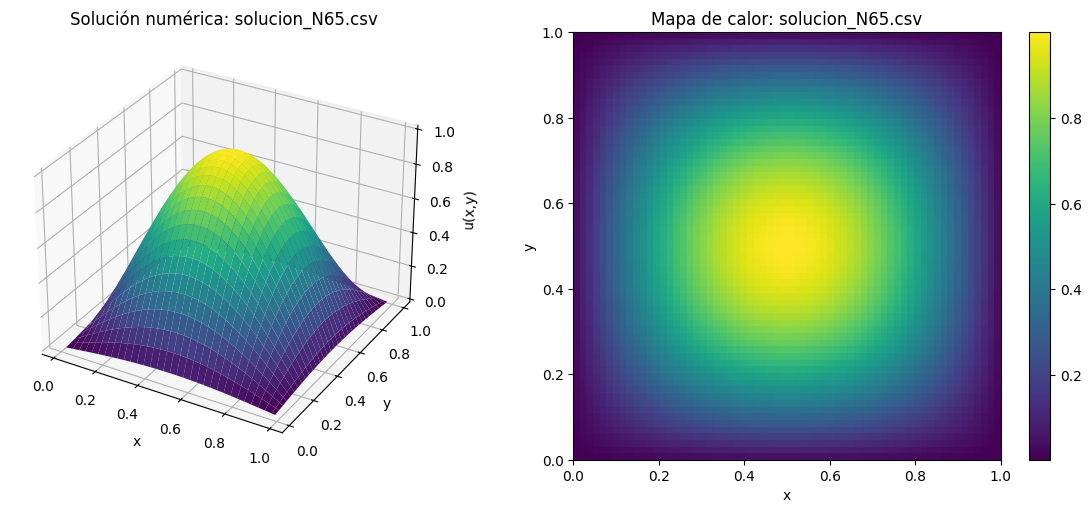

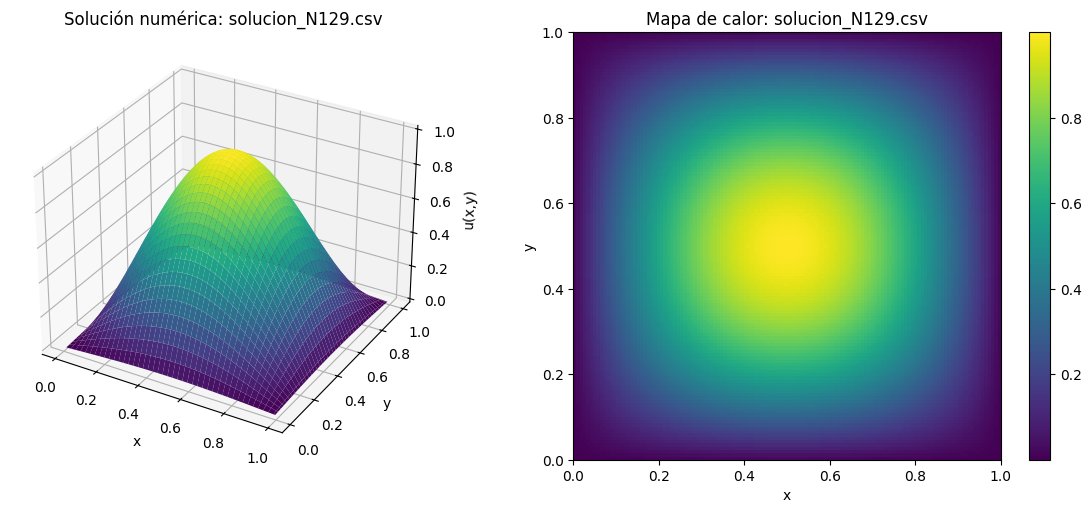

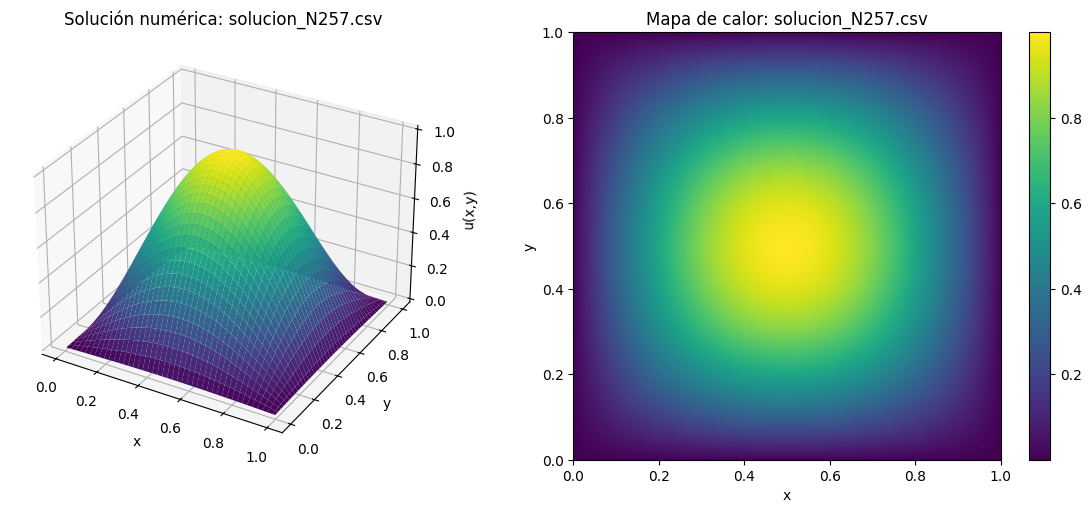

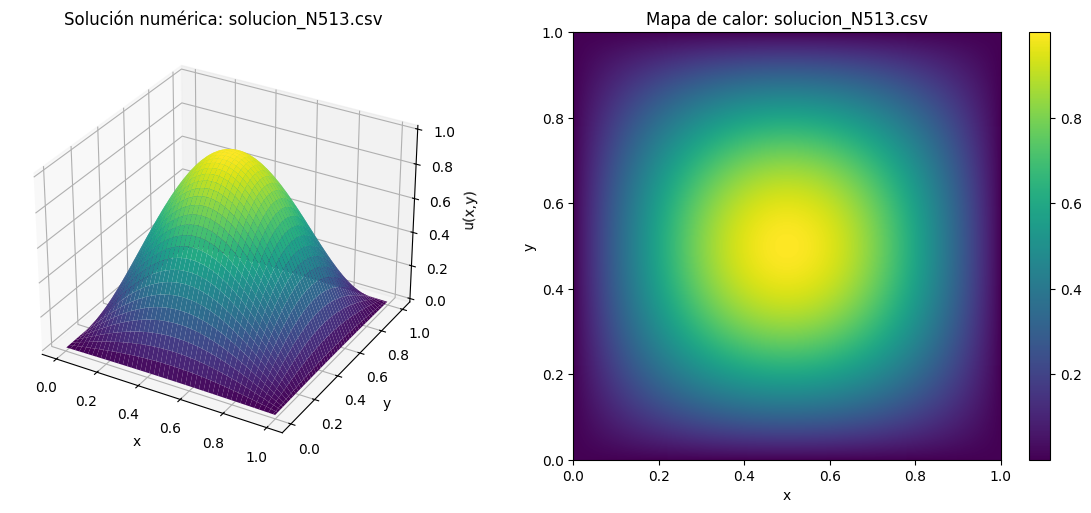

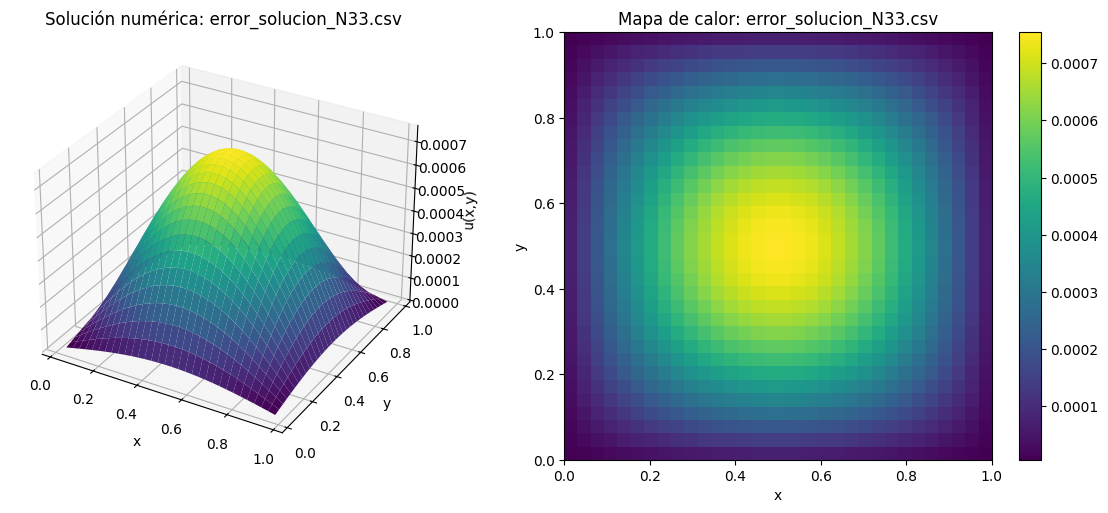

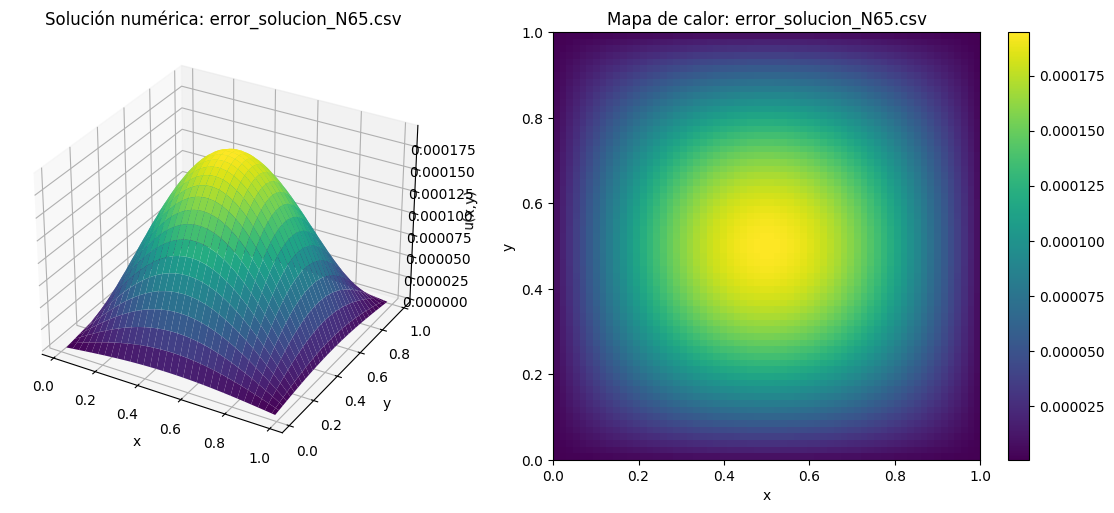

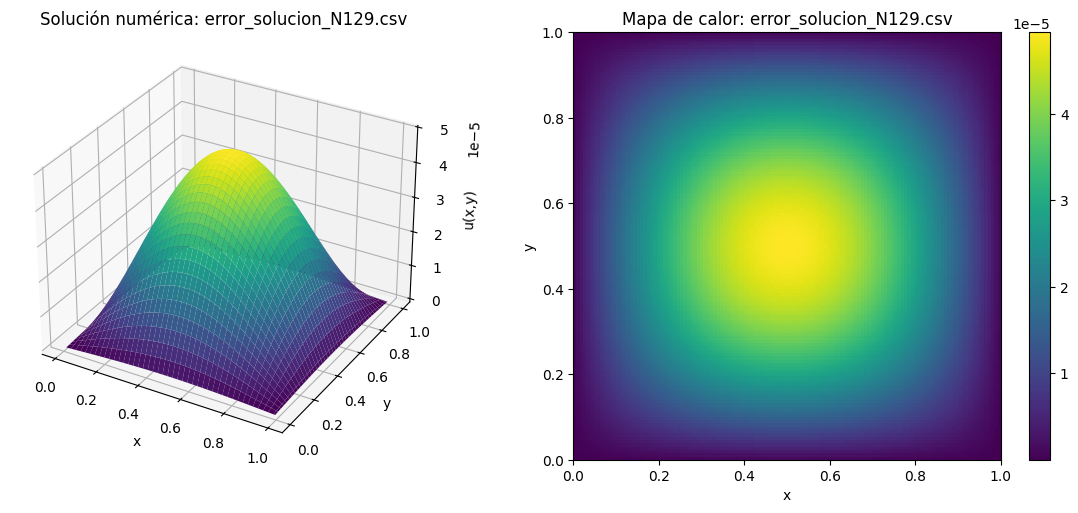

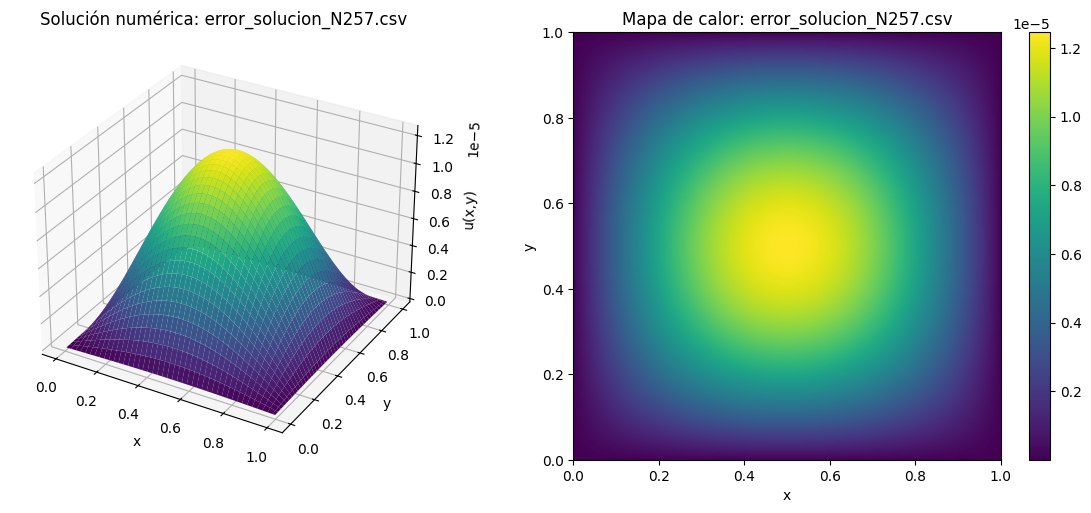

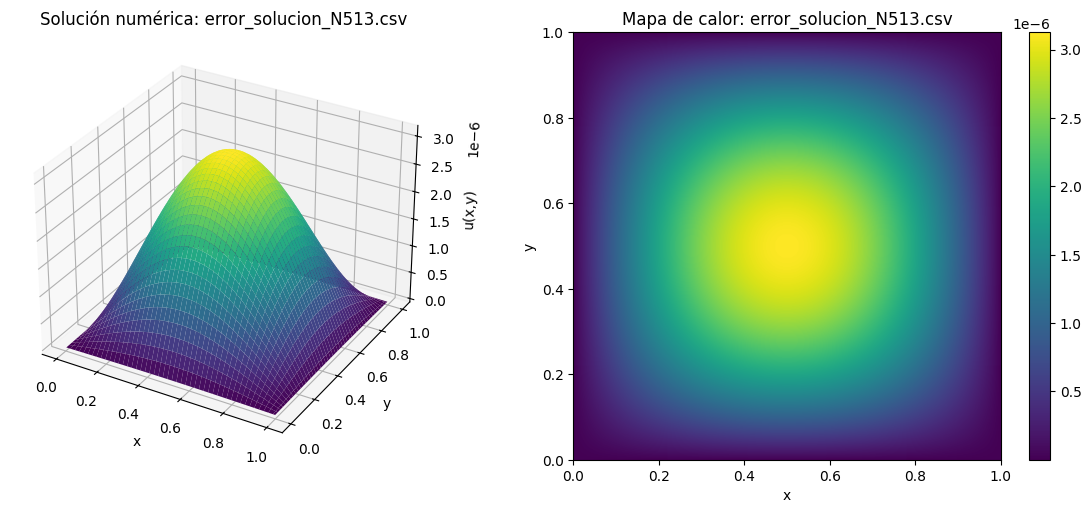

N =  33 | ||E||_2,h = 3.7780e-04 | ||E||_∞ = 7.5388e-04
N =  65 | ||E||_2,h = 9.7345e-05 | ||E||_∞ = 1.9458e-04
N = 129 | ||E||_2,h = 2.4713e-05 | ||E||_∞ = 4.9418e-05
N = 257 | ||E||_2,h = 6.2262e-06 | ||E||_∞ = 1.2452e-05
N = 513 | ||E||_2,h = 1.5626e-06 | ||E||_∞ = 3.1252e-06

Tasas de convergencia:
N =  65 | tasa 2h = 2.00 | tasa ∞ = 2.00
N = 129 | tasa 2h = 2.00 | tasa ∞ = 2.00
N = 257 | tasa 2h = 2.00 | tasa ∞ = 2.00
N = 513 | tasa 2h = 2.00 | tasa ∞ = 2.00


In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from mpl_toolkits.mplot3d import Axes3D
import glob
import re

def compute_rates(errors, Ns):
    rates = []
    for i in range(1, len(errors)):
        rate = np.log(errors[i-1] / errors[i]) / np.log(Ns[i] / Ns[i-1])
        rates.append(rate)
    return rates
def normas(filename):
    df = pd.read_csv(filename)
    e = df['error'].values

    N = int(np.sqrt(len(e))) + 1  # porque hay (N-1)^2 puntos
    h = 1 / N

    # Norma infinito
    err_inf = np.max(np.abs(e))
    # Norma 2h
    err_2h = np.sqrt(h**2 * np.sum(e**2))
    return N, err_2h, err_inf


# Extrae el N de forma de ordenarlso
def extract_N(filename):
    match = re.search(r'solucion_N(\d+)\.csv', filename)
    return int(match.group(1)) if match else float('inf')


def plot_surface(csv_file, error):
    df = pd.read_csv(csv_file)
    x = df['x'].values
    y = df['y'].values
    u = ""
    if error: 
        u = df['error'].values
    else: 
        u = df['u_h'].values
        

    N = int(np.sqrt(len(u))) + 1
    x_unique = np.unique(x)
    y_unique = np.unique(y)
    X, Y = np.meshgrid(x_unique, y_unique)
    U = u.reshape((N - 1, N - 1))

    fig = plt.figure(figsize=(12, 5))

    # Superficie
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, U, cmap='viridis')
    ax1.set_title(f'Solución numérica: {csv_file}')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('u(x,y)')

    # Mapa de calor
    ax2 = fig.add_subplot(1, 2, 2)
    im = ax2.imshow(U, extent=[0,1,0,1], origin='lower', cmap='viridis')
    fig.colorbar(im, ax=ax2)
    ax2.set_title(f'Mapa de calor: {csv_file}') 
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

    plt.tight_layout()
    plt.show()

# Graficar todos los archivos generados
for file in sorted(glob.glob("solucion_N*.csv"), key=extract_N):
    plot_surface(file, error=False)
# Graficar todos los errores 
for file in sorted(glob.glob("error_solucion_N*.csv"), key=extract_N):
    plot_surface(file, error=True)

error_files = sorted(glob.glob("error_solucion_N*.csv"), key=extract_N)
Ns = []
errs_2h = []
errs_inf = []

for file in error_files:
    N, e2, einf = normas(file)
    Ns.append(N)
    errs_2h.append(e2)
    errs_inf.append(einf)
    print(f"N = {N:3d} | ||E||_2,h = {e2:.4e} | ||E||_∞ = {einf:.4e}")

# Tasas de corvergencia

rates_2h = compute_rates(errs_2h, Ns)
rates_inf = compute_rates(errs_inf, Ns)

print("\nTasas de convergencia:")
for i in range(1, len(Ns)):
    print(f"N = {Ns[i]:3d} | tasa 2h = {rates_2h[i-1]:.2f} | tasa ∞ = {rates_inf[i-1]:.2f}")



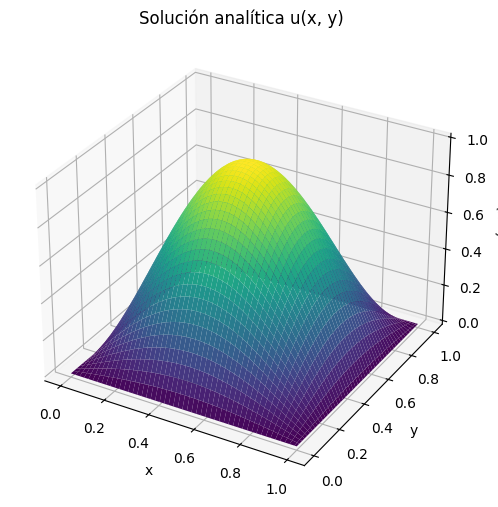

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función exacta
def u_exact(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

# Crear malla de puntos
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Evaluar la función en la malla
Z = u_exact(X, Y)

# Graficar la superficie
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Etiquetas y título
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title('Solución analítica u(x, y)')

# Mostrar gráfico
plt.show()
